In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
from torchvision.datasets import ImageFolder, DatasetFolder
from torchvision.transforms import ToTensor
import torchvision
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import torch.optim as optim
import pathlib

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
TEST_PATH = '/content/gdrive/MyDrive/Omniglot/Tifinagh/'

transform = transforms.Compose(
    [transforms.Grayscale(1),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),
     transforms.Resize((32, 32)),
    ])

dataset = torchvision.datasets.ImageFolder(root=TEST_PATH, transform=transform)
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

In [4]:
def dataset_split (dataset, split_ratio=0.3):

  train_idx, test_idx = train_test_split(list(range(len(dataset))), test_size=split_ratio)
  datasets = {}
  datasets['train'] = Subset(dataset, train_idx)
  datasets['val'] = Subset(dataset, test_idx)

  return datasets

Number of datas in dataset :  1100 
Number datas in Train set : 770 
Number of datas in Test set : 330


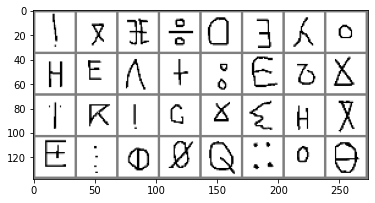

In [5]:
datasets = dataset_split(dataset, 0.3)
trainset = datasets['train']
testset = datasets['val']
print('Number of datas in dataset :  %d \nNumber datas in Train set : %d \nNumber of datas in Test set : %d'
       %(len(dataset), len(trainset), len(testset)))

batch_size = 32

Train = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
Test = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)

import matplotlib.pyplot as plt
def imshow(img):
    img = img / 2 + 0.5 
    #print(img.shape)    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(Train)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))


In [6]:
import ProtoNetBack

output_size = int(len(dataset)/20)
net = ProtoNetBack.ProtoNetBack(1, output_size)
print(net)

ProtoNetBack(
  (layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_accu = []
train_losses = []

for epoch in range(10):

    running_loss = 0.
    correct=0
    total=0
      
    for i, data in enumerate(Train):
          
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
          
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        train_loss=running_loss/len(Train)
        accu=100.*correct/total

        train_accu.append(accu)
        train_losses.append(loss.item())
          
        print('[%d, %5d] loss: %.4f accuracy: %.2f' %(epoch + 1, (i+1)*batch_size, loss.item(), accu))

print('Finished Training')

torch.save(net, '1.pkl')

[1,    32] loss: 4.0141 accuracy: 0.00
[1,    64] loss: 3.9890 accuracy: 3.12
[1,    96] loss: 3.9989 accuracy: 3.12
[1,   128] loss: 4.0103 accuracy: 3.12
[1,   160] loss: 4.0323 accuracy: 3.12
[1,   192] loss: 4.0400 accuracy: 3.12
[1,   224] loss: 3.9713 accuracy: 3.12
[1,   256] loss: 3.9671 accuracy: 3.12
[1,   288] loss: 4.0118 accuracy: 2.78
[1,   320] loss: 3.9491 accuracy: 3.44
[1,   352] loss: 4.0071 accuracy: 3.41
[1,   384] loss: 4.0085 accuracy: 3.39
[1,   416] loss: 3.9457 accuracy: 3.61
[1,   448] loss: 3.8864 accuracy: 4.02
[1,   480] loss: 3.9053 accuracy: 3.96
[1,   512] loss: 3.8682 accuracy: 4.10
[1,   544] loss: 3.9242 accuracy: 3.86
[1,   576] loss: 3.9082 accuracy: 3.99
[1,   608] loss: 3.8782 accuracy: 4.11
[1,   640] loss: 3.8866 accuracy: 4.06
[1,   672] loss: 3.8422 accuracy: 4.02
[1,   704] loss: 3.9053 accuracy: 3.84
[1,   736] loss: 3.8500 accuracy: 3.80
[1,   768] loss: 3.7327 accuracy: 4.30
[1,   800] loss: 3.8738 accuracy: 4.29
[2,    32] loss: 3.6570 a

In [17]:
def plot(train_accu, train_losses):
  
  plt.plot(train_accu)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Train Accuracy')
  plt.show()

  plt.plot(train_losses)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('Train Loss')
  plt.show()

def test(net, testset):

  correct = 0
  total = 0
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  net.to(device)
  Test = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)

  with torch.no_grad():
      for data in Test:
          images, labels = data
          images, labels = images.to(device), labels.to(device)
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the %d test images: %d %%' % (
      len(testset), 100 * correct / total))

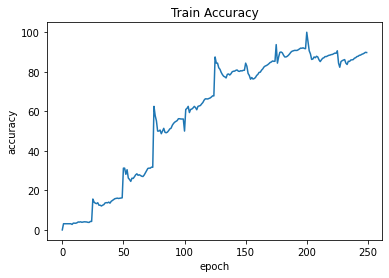

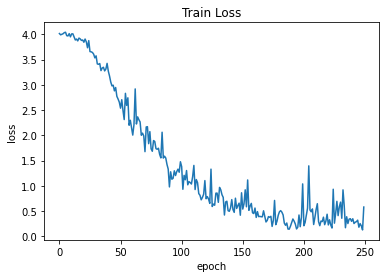

Accuracy of the network on the 330 test images: 83 %


In [9]:

plot(train_accu, train_losses)
test(net, testset)

In [10]:
PATH = '/content/gdrive/MyDrive/Omniglot/'
transform = transforms.Compose(
    [transforms.Grayscale(1),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),
     transforms.Resize((32, 32)),
    ])


for path in pathlib.Path(PATH).iterdir():
  dataset_name = str(path).split('/')[-1]

  dataset = torchvision.datasets.ImageFolder(root=str(path), transform=transform)
  datasets = dataset_split(dataset, 0.3)
  trainset = datasets['train']
  testset = datasets['val']
  print('Number of datas in dataset :  %d \nNumber datas in Train set : %d \nNumber of datas in Test set : %d'
       %(len(dataset), len(trainset), len(testset)))

  batch_size = 32

  Train = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
  net = ProtoNetBack.ProtoNetBack(1, int(len(dataset)/20))

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  net.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(net.parameters(), lr=0.001)

  for epoch in range(10):
      running_loss = 0.
      correct=0
      total=0
      for i, data in enumerate(Train):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
            
          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += predicted.eq(labels).sum().item()
          train_loss=running_loss/len(Train)
          accu=100.*correct/total
    
      print('%d loss: %.4f accuracy: %.2f' %(epoch + 1, loss.item(), accu))

  print('___________________________________________________________________________')

  torch.save(net, 'Models/' + dataset_name + '.pkl')


Number of datas in dataset :  400 
Number datas in Train set : 280 
Number of datas in Test set : 120
1 loss: 2.9015 accuracy: 10.71
2 loss: 2.3126 accuracy: 28.93
3 loss: 1.8804 accuracy: 42.86
4 loss: 1.1708 accuracy: 57.14
5 loss: 0.8202 accuracy: 78.21
6 loss: 0.4731 accuracy: 92.50
7 loss: 0.1716 accuracy: 97.14
8 loss: 0.0900 accuracy: 98.57
9 loss: 0.0509 accuracy: 98.93
10 loss: 0.0194 accuracy: 99.64
___________________________________________________________________________
Number of datas in dataset :  660 
Number datas in Train set : 462 
Number of datas in Test set : 198
1 loss: 3.2375 accuracy: 7.36
2 loss: 2.7586 accuracy: 24.03
3 loss: 1.7094 accuracy: 45.02
4 loss: 0.9481 accuracy: 67.32
5 loss: 0.5396 accuracy: 81.82
6 loss: 0.3896 accuracy: 86.80
7 loss: 0.4630 accuracy: 91.99
8 loss: 0.2962 accuracy: 95.02
9 loss: 0.0383 accuracy: 98.92
10 loss: 0.0214 accuracy: 99.13
___________________________________________________________________________
Number of datas in data

In [19]:
PATH = '/content/gdrive/MyDrive/Omniglot/'
transform = transforms.Compose(
    [transforms.Grayscale(1),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),
     transforms.Resize((32, 32)),
    ])

print('____________________________________________')
for path in pathlib.Path(PATH).iterdir():
  model_name = str(path).split('/')[-1]
  dataset = torchvision.datasets.ImageFolder(root=str(path), transform=transform)
  datasets = dataset_split(dataset, 0.3)
  testset = datasets['val']

  model = torch.load('Models/' + model_name + '.pkl')
  print('Dataset : ' + model_name + '  :')
  test(model, testset)
  print('____________________________________________')

____________________________________________
Dataset : Alphabet_of_the_Magi  :
Accuracy of the network on the 120 test images: 95 %
____________________________________________
Dataset : Cyrillic  :
Accuracy of the network on the 198 test images: 93 %
____________________________________________
Dataset : Armenian  :
Accuracy of the network on the 249 test images: 77 %
____________________________________________
Dataset : Bengali  :
Accuracy of the network on the 276 test images: 80 %
____________________________________________
Dataset : Arcadian  :
Accuracy of the network on the 156 test images: 90 %
____________________________________________
Dataset : Anglo-Saxon_Futhorc  :
Accuracy of the network on the 174 test images: 100 %
____________________________________________
Dataset : Burmese_(Myanmar)  :
Accuracy of the network on the 204 test images: 92 %
____________________________________________
Dataset : Asomtavruli_(Georgian)  :
Accuracy of the network on the 240 test images: